In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mapping = {
    1: "Quận 1", 2: "Quận 2", 3: "Quận 3", 4: "Quận 4", 5: "Quận 5", 6: "Quận 6",
    7: "Quận 7", 8: "Quận 8", 9: "Quận 9", 10: "Quận 10", 11: "Quận 11", 12: "Quận 12",
    13: "Bình Thạnh", 14: "Gò Vấp", 15: "Phú Nhuận", 16: "Tân Bình", 17: "Tân Phú",
    18: "Bình Tân", 19: "Thủ Đức", 20: "Bình Chánh", 21: "Cần Giờ",
    22: "Củ Chi", 23: "Hóc Môn", 24: "Nhà Bè"
}
mapping_noi_that = {0: "Không", 1: "Cơ bản", 2: "Đầy đủ", 3: "Cao cấp"}

In [3]:
df = pd.read_csv("./DSPhongTro_DaXuLy.csv", encoding='utf-8-sig', sep='\t')
df.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,16,20.0,1.0,1.0,2,4.0,2024-10-22
1,16,60.0,2.0,2.0,0,10.0,2024-10-23
2,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,2,30.0,1.0,1.0,2,4.1,2024-10-17
4,19,28.0,1.0,1.0,0,2.8,2024-10-23


In [4]:
df.dtypes

Địa chỉ            int64
Diện tích        float64
Số phòng ngủ     float64
Số toilet        float64
Nội thất           int64
Mức giá          float64
Ngày đăng tin     object
dtype: object

#  3.2.4 Tiện nghi- Tiện ích

## Câu hỏi 1: Khu vực nào phòng trọ có sẵn nội thất nhiều? 

### Bước 1: Nhóm các phòng trọ theo khu vực (Địa chỉ) và tính tổng giá trị cột Nội thất cho mỗi khu vực

In [5]:
noi_that_theo_khu_vuc = df.groupby('Địa chỉ')['Nội thất'].sum()
noi_that_theo_khu_vuc

Địa chỉ
1     411
2     698
3     353
4     105
5     138
6      82
7     585
8     204
9      92
10    317
11     44
12    152
13    963
14    467
15    346
16    646
17    328
18    171
19    155
20    104
23     15
24     42
Name: Nội thất, dtype: int64

### Bước 2: Sắp xếp các khu vực theo tổng giá trị Nội thất theo thứ tự giảm dần

In [6]:
noi_that_theo_khu_vuc_sorted = noi_that_theo_khu_vuc.sort_values(ascending=False)
noi_that_theo_khu_vuc_sorted

Địa chỉ
13    963
2     698
16    646
7     585
14    467
1     411
3     353
15    346
17    328
10    317
8     204
18    171
19    155
12    152
5     138
4     105
20    104
9      92
6      82
11     44
24     42
23     15
Name: Nội thất, dtype: int64

### Bước 3: Xác định khu vực đứng đầu danh sách

In [7]:
khu_vuc_nhieu_noi_that_nhat = noi_that_theo_khu_vuc_sorted.index[0]
print("Khu vực có nhiều phòng trọ có sẵn nội thất nhất: ", khu_vuc_nhieu_noi_that_nhat)

Khu vực có nhiều phòng trọ có sẵn nội thất nhất:  13


## Trả lời
Ta thấy địa chỉ có số thứ tự 2 có các phòng trọ có sẵn nội thất nhiều nhất, dựa trên ánh xạ `address` ta biết được rằng đây là khu vực quận Bình Thạnh

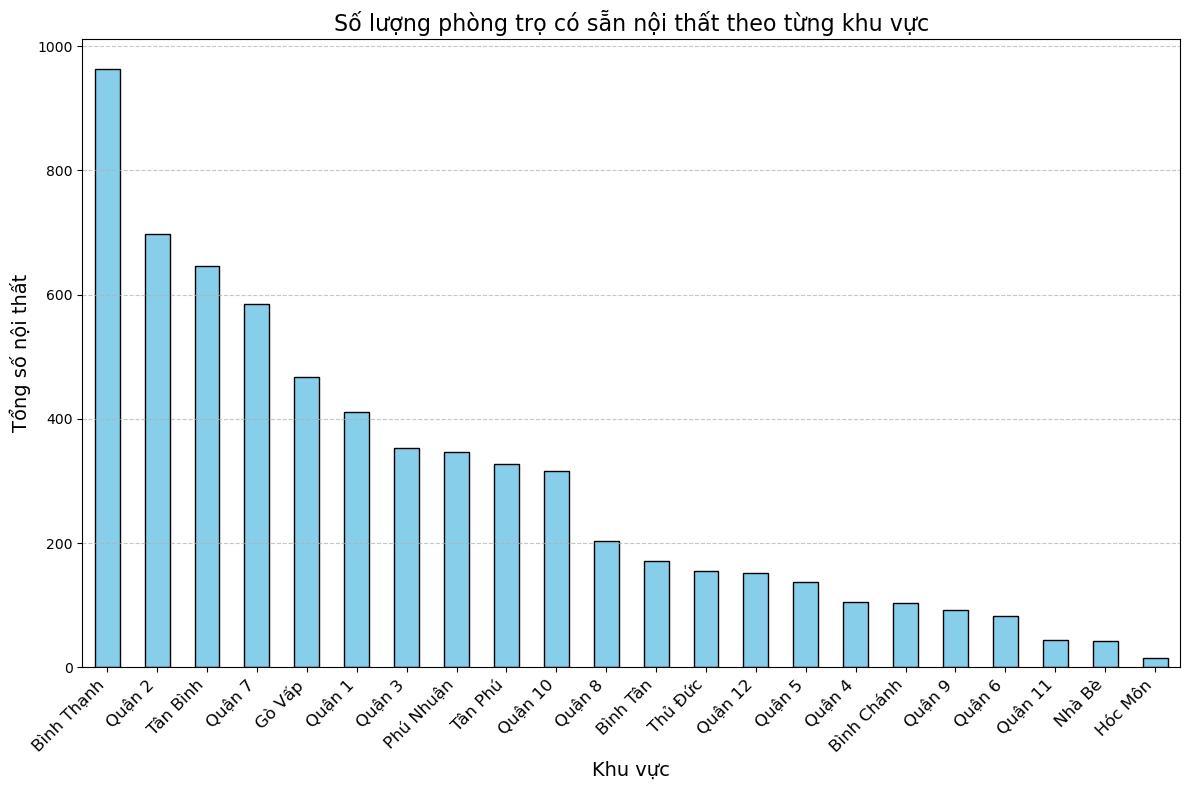

In [8]:
noi_that_theo_khu_vuc_sorted_named = noi_that_theo_khu_vuc_sorted.rename(index=mapping)

# Plot the bar chart
plt.figure(figsize=(12, 8))
noi_that_theo_khu_vuc_sorted_named.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Số lượng phòng trọ có sẵn nội thất theo từng khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Tổng số nội thất", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Phân tích số lượng phòng trọ có sẵn nội thất theo khu vực tại TP.HCM

### Tổng quan
- Biểu đồ thể hiện số lượng phòng trọ có sẵn nội thất phân bố theo các quận/huyện tại TP.HCM
- Dữ liệu được biểu diễn dưới dạng biểu đồ cột, sắp xếp theo thứ tự giảm dần

### Các điểm chính

1. Phân bố không đồng đều:
- Bình Thạnh dẫn đầu với khoảng 950 phòng trọ có nội thất
- Top 3 khu vực có nhiều phòng trọ nhất: Bình Thạnh, Quận 2, Tân Bình
- Các khu vực có ít phòng trọ nhất: Hóc Môn, Nhà Bè, Quận 11 (<100 phòng)

2. Phân nhóm khu vực:
- Nhóm cao (>600): Bình Thạnh, Quận 2, Tân Bình
- Nhóm trung bình (300-600): Quận 7, Gò Vấp, Quận 1, Quận 3, Phú Nhuận
- Nhóm thấp (<300): Các quận/huyện còn lại

3. Xu hướng:
- Các quận trung tâm và các quận phát triển mới có số lượng phòng trọ cao
- Các quận/huyện ngoại thành có số lượng phòng trọ thấp hơn đáng kể

### Ý nghĩa

1. Cung cầu:
- Phản ánh nhu cầu nhà ở tại các khu vực trung tâm và phát triển mới
- Cho thấy xu hướng đầu tư căn hộ dịch vụ tập trung tại các khu vực phát triển

2. Quy hoạch:
- Thể hiện sự phát triển không đồng đều giữa các khu vực
- Cơ hội phát triển cho các khu vực có số lượng thấp

### Khuyến nghị:
- Cần có chính sách phát triển đồng đều cho các khu vực
- Tiềm năng đầu tư tại các khu vực đang phát triển như Quận 7, Gò Vấp
- Cần nghiên cứu thêm về giá cả và chất lượng phòng trọ tại các khu vực

## Câu hỏi 2: Số lượng phòng nhóm theo nội thất phân bố như thế nào?

### Bước 1: Đếm số lượng phòng theo từng loại nội thất.

In [9]:
# Thêm cột Nội thất theo mô tả
df['Nội thất (Mô tả)'] = df['Nội thất'].map(mapping_noi_that)

# Đếm số lượng phòng nhóm theo loại nội thất
so_luong_theo_noi_that = df['Nội thất (Mô tả)'].value_counts()
so_luong_theo_noi_that

Nội thất (Mô tả)
Đầy đủ     2906
Không      1120
Cơ bản      558
Cao cấp      16
Name: count, dtype: int64

### Bước 2: Vẽ biểu đồ trực quan

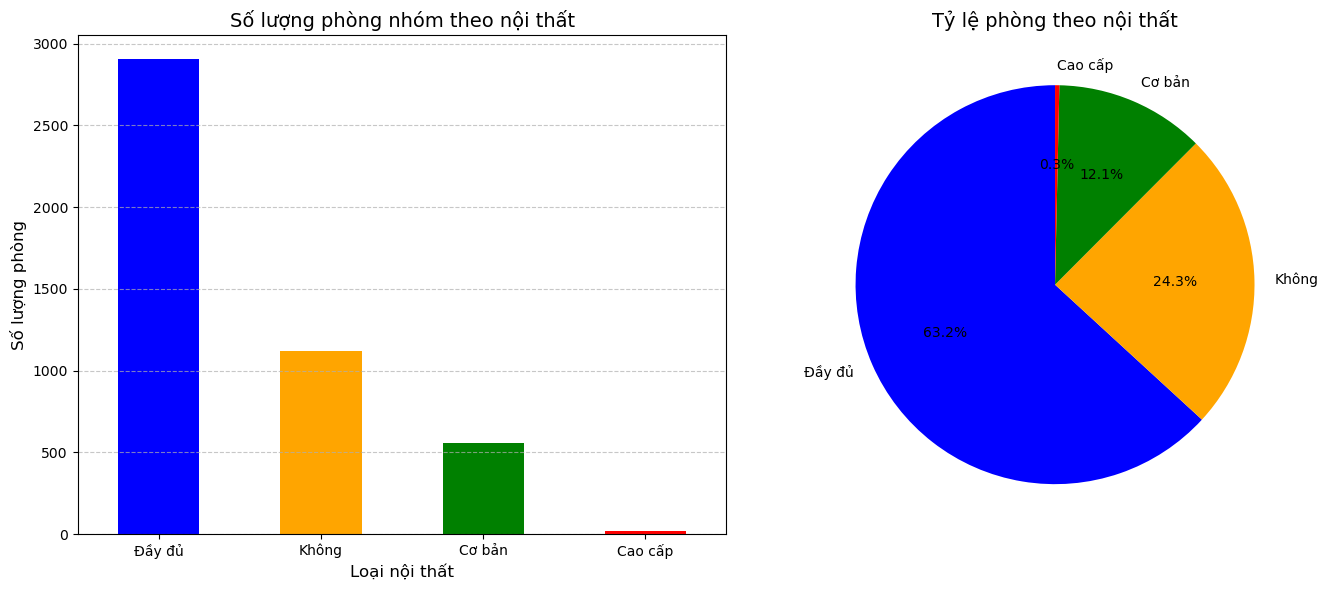

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Biểu đồ cột
so_luong_theo_noi_that.plot(
    kind='bar', 
    color=['blue', 'orange', 'green', 'red'], 
    ax=axes[0]
)
axes[0].set_title("Số lượng phòng nhóm theo nội thất", fontsize=14)
axes[0].set_xlabel("Loại nội thất", fontsize=12)
axes[0].set_ylabel("Số lượng phòng", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Biểu đồ tròn
so_luong_theo_noi_that.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['blue', 'orange', 'green', 'red'], 
    startangle=90, 
    ax=axes[1]
)
axes[1].set_title("Tỷ lệ phòng theo nội thất", fontsize=14)
axes[1].set_ylabel("")  # Bỏ nhãn Y để gọn biểu đồ

# Tùy chỉnh khoảng cách giữa 2 biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## Phân tích số lượng và tỷ lệ phòng trọ theo mức độ nội thất tại TP.HCM

### Tổng quan
- Dữ liệu được thể hiện qua 2 biểu đồ: biểu đồ cột về số lượng và biểu đồ tròn về tỷ lệ
- Phân loại nội thất thành 4 mức độ: đầy đủ, không có, cơ bản, và cao cấp

### Phân tích chi tiết

1. Số lượng phòng theo nội thất:
- Phòng có nội thất đầy đủ: khoảng 2,900 phòng (chiếm 63.2%)
- Phòng không có nội thất: khoảng 1,100 phòng (chiếm 24.3%)
- Phòng có nội thất cơ bản: khoảng 550 phòng (chiếm 12.1%)
- Phòng có nội thất cao cấp: số lượng rất ít (chiếm 0.3%)

2. Xu hướng thị trường:
- Đa số phòng trọ (>60%) được trang bị nội thất đầy đủ
- Gần 1/4 số phòng không có nội thất, cho thấy vẫn có nhu cầu về phòng trống
- Phân khúc cao cấp chiếm tỷ lệ nhỏ, phản ánh thị trường chủ yếu phục vụ phân khúc bình dân

### Nhận định

1. Về thị hiếu:
- Người thuê ưa chuộng phòng có nội thất đầy đủ
- Thị trường phòng trọ cao cấp còn khá hạn chế
- Vẫn tồn tại nhu cầu về phòng không nội thất (có thể do giá rẻ hơn)

2. Về đầu tư:
- Chủ đầu tư có xu hướng trang bị nội thất đầy đủ để tăng khả năng cho thuê
- Phân khúc cao cấp còn nhiều dư địa phát triển
- Cần cân nhắc chi phí-lợi nhuận khi đầu tư nội thất

### Đề xuất

1. Cho chủ đầu tư:
- Tập trung vào phân khúc nội thất đầy đủ
- Cân nhắc phát triển phân khúc cao cấp tại các khu vực trung tâm
- Đa dạng hóa lựa chọn để đáp ứng nhiều đối tượng khách hàng

2. Cho người thuê:
- Nhiều lựa chọn về mức độ nội thất
- Cân nhắc chi phí thuê theo nhu cầu sử dụng nội thất
- So sánh giá thuê giữa các loại phòng để có quyết định phù hợp

## Phân tích phân bố các phòng có nội thất "Đầy đủ" 

### Bước 1: Lọc dữ liệu các phòng có nội thất là "Đầy đủ" 

In [11]:
phong_noi_that_day_du = df[df['Nội thất'] == 2]

### Bước 2: Nhóm dữ liệu theo khu vực và đếm số lượng

In [12]:
so_luong_theo_khu_vuc = phong_noi_that_day_du.groupby('Địa chỉ').size()

### Bước 3: Sắp xếp kết quả giảm dần

In [13]:
so_luong_theo_khu_vuc_sorted = so_luong_theo_khu_vuc.sort_values(ascending=False)
so_luong_theo_khu_vuc_sorted = so_luong_theo_khu_vuc_sorted.rename(index=mapping)

### Bước 4: Vẽ biểu đồ cột để hiển thị

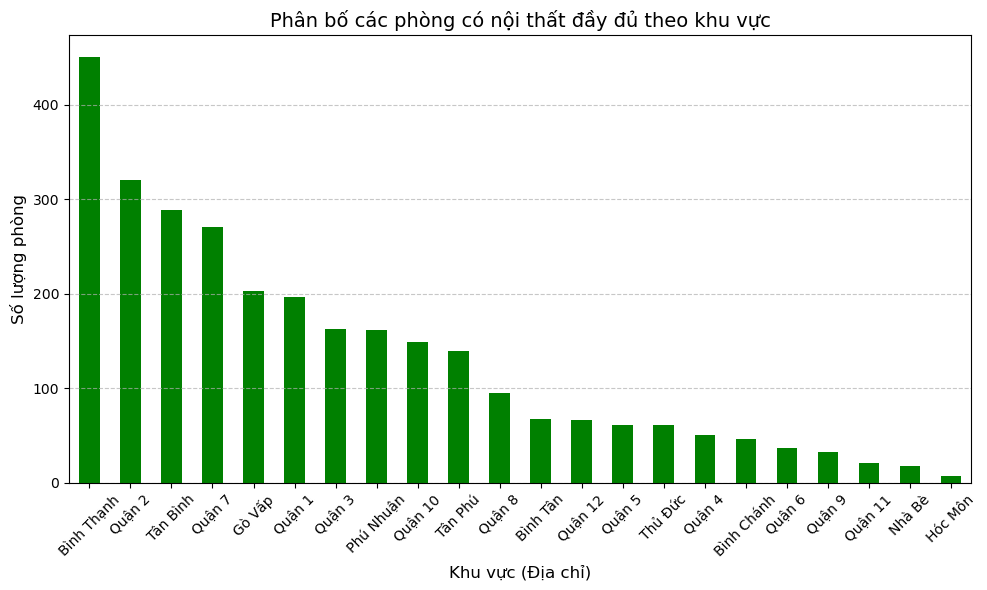

In [14]:
so_luong_theo_khu_vuc_sorted.plot(
    kind='bar',
    figsize=(10, 6),
    color='green'
)
plt.title('Phân bố các phòng có nội thất đầy đủ theo khu vực', fontsize=14)
plt.xlabel('Khu vực (Địa chỉ)', fontsize=12)
plt.ylabel('Số lượng phòng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Nhận xét
Nhìn chung phân bố các phòng có nội thất đầy đủ có có sự phân bố giống với phân bố số lượng các phòng có sẵn nội thất  

## Câu hỏi 3:  Phần trăm số lượng phòng có từ 2 phòng ngủ?

### Bước 1: Đếm số lượng phòng trọ có `Số phòng ngủ >= 2`

In [15]:
so_phong_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2].shape[0]
print("Số lượng phòng trọ có từ 2 phòng ngủ trở lên:", so_phong_tu_2_phong_ngu)

Số lượng phòng trọ có từ 2 phòng ngủ trở lên: 164


### Bước 2: Tính tổng số lượng phòng trọ

In [16]:
tong_so_phong_tro = df.shape[0]
print("Tổng số lượng phòng trọ:", tong_so_phong_tro)

Tổng số lượng phòng trọ: 4600


### Bước 3: Tính tỷ lệ phần trăm

In [17]:
phan_tram = (so_phong_tu_2_phong_ngu / tong_so_phong_tro) * 100
print(f"Phần trăm số lượng phòng có từ 2 phòng ngủ: {phan_tram:.2f}%")


Phần trăm số lượng phòng có từ 2 phòng ngủ: 3.57%


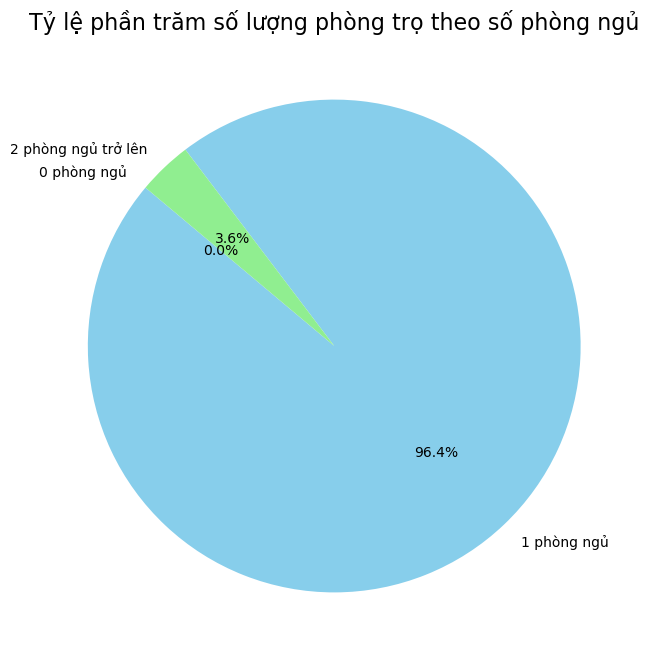

In [18]:
so_phong_tro_0 = df[df['Số phòng ngủ'] == 0].shape[0]
so_phong_tro_1 = df[df['Số phòng ngủ'] == 1].shape[0]
so_phong_tro_2_or_more = df[df['Số phòng ngủ'] >= 2].shape[0]

# Tạo dữ liệu cho biểu đồ tròn
labels = ['0 phòng ngủ', '1 phòng ngủ', '2 phòng ngủ trở lên']
values = [so_phong_tro_0, so_phong_tro_1, so_phong_tro_2_or_more]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen'])

# Thêm tiêu đề
plt.title("Tỷ lệ phần trăm số lượng phòng trọ theo số phòng ngủ", fontsize=16)

# Hiển thị biểu đồ
plt.show()

## Trả lời
Phần trăm số lượng phòng có từ 2 phòng ngủ là `3.6%`, các phòng còn lại đều chỉ có `1` phòng ngủ, ta tiến hành phân tích xem các khu vực nào chứa nhiều phòng có từ 2 phòng ngủ trở lên

### Phân tích: Các phòng có từ 2 phòng ngủ trở lên tập trung ở khu vực nào?

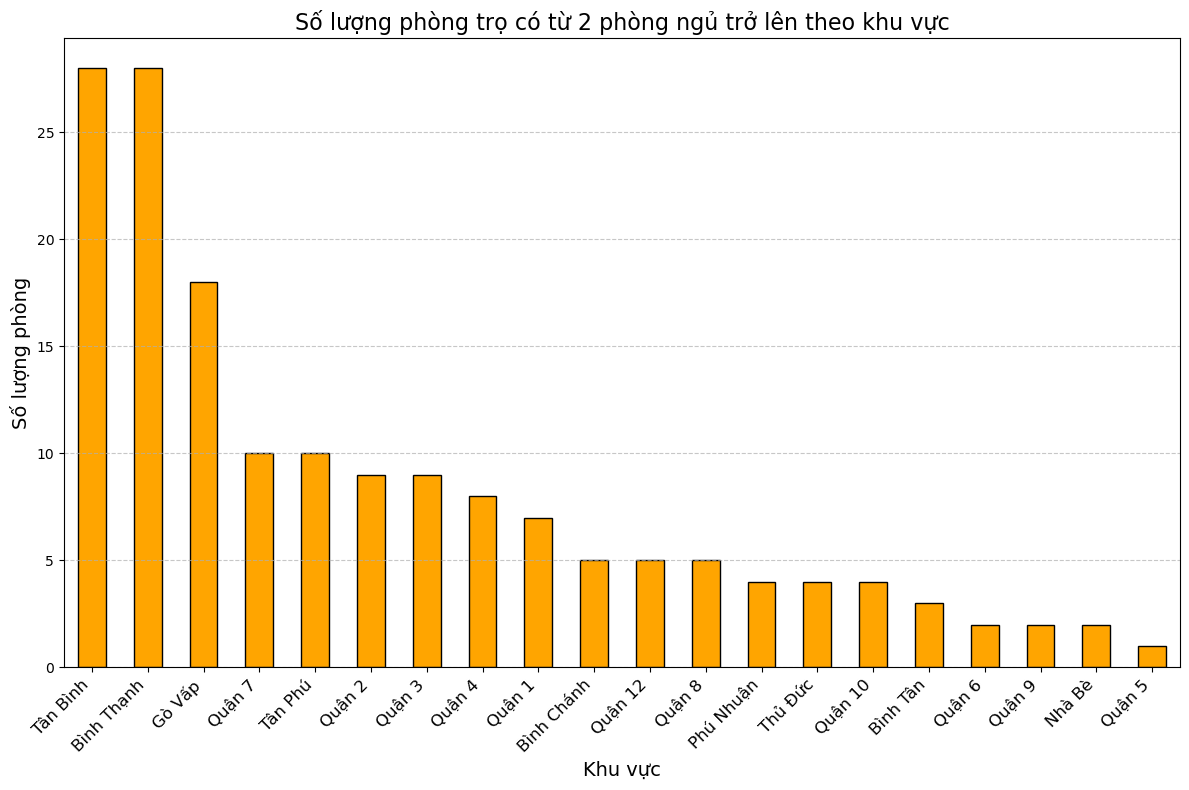

In [19]:
phong_tro_tu_2_phong_ngu = df[df['Số phòng ngủ'] >= 2]
phong_tro_theo_khu_vuc = phong_tro_tu_2_phong_ngu.groupby('Địa chỉ').size()
phong_tro_theo_khu_vuc_sorted = phong_tro_theo_khu_vuc.sort_values(ascending=False)
phong_tro_theo_khu_vuc_sorted_named = phong_tro_theo_khu_vuc_sorted.rename(index=mapping)
plt.figure(figsize=(12, 8))
phong_tro_theo_khu_vuc_sorted_named.plot(kind='bar', color='orange', edgecolor='black')

# Thêm tiêu đề và nhãn trục
plt.title("Số lượng phòng trọ có từ 2 phòng ngủ trở lên theo khu vực", fontsize=16)
plt.xlabel("Khu vực", fontsize=14)
plt.ylabel("Số lượng phòng", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



## Phân tích số lượng phòng trọ từ 2 phòng ngủ trở lên theo khu vực tại TP.HCM

### Phân bố địa lý
- Khu vực có nhiều phòng trọ nhất là Tân Bình và Bình Thạnh (khoảng 28 phòng mỗi quận)
- Top 3 khu vực dẫn đầu bao gồm: Tân Bình, Bình Thạnh và Gò Vấp (17-28 phòng)
- Các quận trung tâm như Quận 1, Quận 3 có số lượng phòng trọ ở mức trung bình (7-9 phòng)
- Các quận ngoại thành như Quận 9, Nhà Bè có ít phòng trọ nhất (2-3 phòng)

### Phân tích xu hướng
1. Tập trung cao ở khu vực phát triển:
   - Các quận có nhiều phòng trọ thường là những khu vực phát triển sớm, gần trung tâm
   - Có hệ thống hạ tầng và tiện ích đầy đủ
   
2. Phân bố không đồng đều:
   - Chênh lệch rõ rệt giữa các khu vực (28 phòng vs 1 phòng)
   - Khoảng 60% tổng số phòng trọ tập trung ở 5 quận đầu tiên

3. Tiềm năng phát triển:
   - Các quận có số lượng phòng trọ thấp có thể là cơ hội đầu tư trong tương lai
   - Đặc biệt là các khu vực đang phát triển như Quận 9, Nhà Bè

### Kiến nghị
1. Nhà đầu tư có thể:
   - Tập trung vào các khu vực có nhu cầu cao như Tân Bình, Bình Thạnh
   - Khảo sát thị trường tại các khu vực mới nổi để đón đầu xu hướng

2. Người thuê nên:
   - Cân nhắc các khu vực lân cận trung tâm để có nhiều lựa chọn hơn
   - So sánh giá cả giữa các khu vực để tìm được lựa chọn tối ưu

# Khám phá tương quan

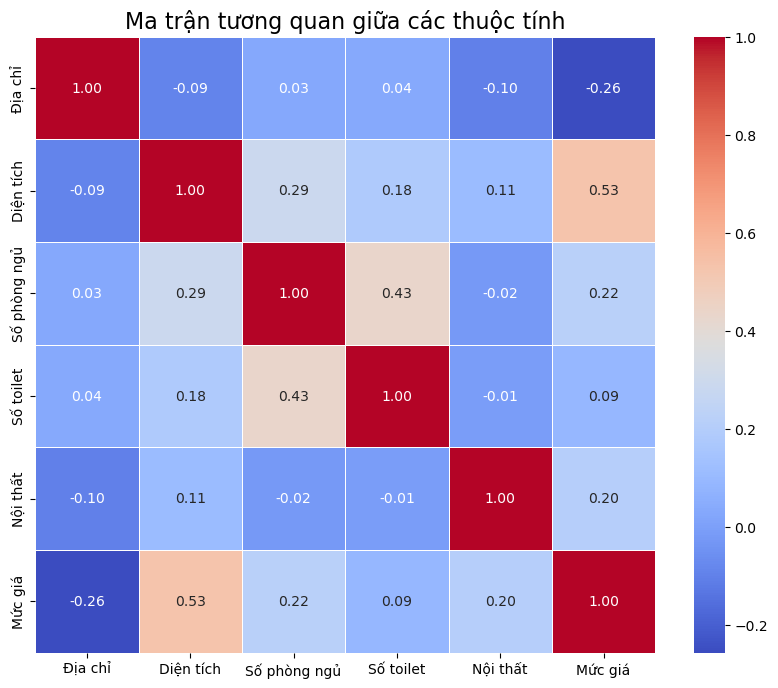

In [25]:
df_numeric = df.drop(columns=['Ngày đăng tin', 'Nội thất (Mô tả)'])

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Ma trận tương quan giữa các thuộc tính", fontsize=16)

plt.show()

## Phân tích ma trận tương quan giữa các thuộc tính của nhà trọ

### Các tương quan tích cực mạnh (>0.4)
1. Diện tích và Mức giá (0.53):
   - Mối quan hệ tương quan thuận khá mạnh
   - Diện tích càng lớn thì mức giá càng cao
   
2. Số phòng ngủ và Số toilet (0.43):
   - Tương quan thuận vừa phải
   - Phù hợp logic: nhà có nhiều phòng ngủ thường có nhiều toilet

### Các tương quan yếu (0.2 - 0.4)
1. Diện tích và Số phòng ngủ (0.29):
   - Tương quan thuận yếu
   - Cho thấy không phải cứ diện tích lớn là có nhiều phòng ngủ

2. Số phòng ngủ và Mức giá (0.22):
   - Tương quan thuận yếu
   - Số phòng ngủ không phải là yếu tố quyết định chính đến giá

### Các tương quan nghịch đáng chú ý
1. Địa chỉ và Mức giá (-0.26):
   - Tương quan nghịch yếu
   - Có thể hiểu là các khu vực xa trung tâm có giá thấp hơn

2. Địa chỉ và Diện tích (-0.09):
   - Tương quan nghịch rất yếu
   - Cho thấy diện tích không phụ thuộc nhiều vào vị trí

### Điểm đáng chú ý
1. Nội thất có tương quan yếu với hầu hết các thuộc tính khác:
   - Với mức giá (0.20)
   - Với diện tích (0.11)
   - Với số phòng ngủ (-0.02)

2. Số toilet có tương quan yếu với mức giá (0.09):
   - Cho thấy số lượng toilet không ảnh hưởng nhiều đến giá

---

### Kết luận
1. Yếu tố ảnh hưởng chính đến giá:
   - Diện tích là yếu tố quan trọng nhất
   - Vị trí (địa chỉ) có ảnh hưởng nghịch
   
2. Các yếu tố có ảnh hưởng vừa phải:
   - Số phòng ngủ
   - Nội thất

3. Gợi ý cho người thuê:
   - Cần cân nhắc tổng thể các yếu tố
   - Không nên chỉ tập trung vào một yếu tố đơn lẻ
